In [1]:
# project: p9
# submitter: cmbatchelor
# partner: none
# hours: 4

In [2]:
import csv
import copy 
import matplotlib
import pandas

# Allows you to render matplotlib graphs in the same notebook
%matplotlib inline 

def plot_dict(d, labelx="Please Label Me!!!", labely="Please Label Me!!!"):
    ax = pandas.Series(d).sort_index().plot.bar(color="black", fontsize=16)
    ax.set_ylabel(labely, fontsize=16)
    ax.set_xlabel(labelx, fontsize=16)

In [3]:
def process_csv(filename):
    example_file = open(filename, encoding="utf-8")
    example_reader = csv.reader(example_file)
    example_data = list(example_reader)
    example_file.close()
    return example_data

In [4]:
def get_mapping(path):
    csv_data = process_csv(path) # you can use this function from p7
    mapping_dict = {}
    # TODO: make a dictionary where keys are the ID's and values are the names
    for row in csv_data:
        mapping_dict[row[0]] = row[1]
    return mapping_dict

In [5]:
def get_raw_movies(path):
    csv_data = process_csv(path) # you can use this function from p7
    header = csv_data[0]
    rows = csv_data[1:]
    raw_movie_list = []
    for row in rows:
        raw_movie_dict = {}
        raw_movie_dict[header[0]] = row[0]
        raw_movie_dict[header[1]] = int(row[1])
        raw_movie_dict[header[2]]= row[2].split(', ')
        raw_movie_dict[header[3]]= int(row[3])
        raw_movie_dict[header[4]]= row[4].split(', ')
        raw_movie_dict[header[5]]= row[5].split(', ')
        raw_movie_dict[header[6]] = float(row[6])
        raw_movie_list.append(raw_movie_dict)
    return raw_movie_list

In [6]:
def get_movies(movies_path, mapping_path):
    raw_movies = get_raw_movies(movies_path)
    mapping = get_mapping(mapping_path)
    for dic in raw_movies:
        if dic['title'] in mapping:
            dic['title'] = mapping[dic['title']]
        director_list = []
        actor_list = []
        for director in dic['directors']:
            if director in mapping:
                director_list.append(mapping[director])
                dic['directors'] = director_list
        for actor in dic['actors']:
            if actor in mapping:
                actor_list.append(mapping[actor])
                dic['actors'] = actor_list
    return raw_movies
    

In [7]:
movies = get_movies("movies.csv", "mapping.csv")

In [8]:
def search_bar(movies, keyword):
    '''given a list of movie dictionaries and a keyword, 
    returns a list of movies that contains the keyword'''
    idx = 0
    while idx < len(movies):
        movie = movies[idx]
        if (keyword not in movie['title']) and (keyword not in movie["genres"]) and  (keyword not in movie["directors"]) and (keyword not in movie["actors"]):
            movies.pop(idx)
        else:
            idx += 1
    return movies

In [9]:
movies

[{'title': 'They Live',
  'year': 1988,
  'genres': ['Action', 'Horror', 'Sci-Fi'],
  'duration': 94,
  'directors': ['John Carpenter'],
  'actors': ['Roddy Piper', 'Keith David', 'Meg Foster'],
  'rating': 7.3},
 {'title': 'Beyond Justice',
  'year': 2014,
  'genres': ['Crime', 'Thriller'],
  'duration': 86,
  'directors': ['Timothy Woodward Jr.'],
  'actors': ['Vinnie Jones', 'Mischa Barton'],
  'rating': 3.4},
 {'title': 'Dirty Beautiful',
  'year': 2015,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 95,
  'directors': ['Tim Bartell'],
  'actors': ['Ricky Mabe', 'Jordan Monaghan', 'Conor Leslie', 'Darin Heames'],
  'rating': 5.5},
 {'title': 'American Milkshake',
  'year': 2013,
  'genres': ['Comedy'],
  'duration': 83,
  'directors': ['David Andalman', 'Mariko Munro'],
  'actors': ['Leo Fitzpatrick', 'Tyler Ross', 'Shareeka Epps'],
  'rating': 4.7},
 {'title': 'Honeydripper',
  'year': 2007,
  'genres': ['Crime', 'Drama', 'History'],
  'duration': 124,
  'directors': ['

In [10]:
#q1
lord_of_rings = copy.copy(movies)
lord_list = search_bar(lord_of_rings, "Lord of the Rings")
peter_list = search_bar(lord_of_rings, "Peter Jackson")
peter_rating = []
for dic in peter_list:
    peter_rating.append(dic['rating'])
sum(peter_rating) / len(peter_rating)

8.8

In [11]:
#q2
def median(items):
    items.sort() 
    if len(items) % 2 == 1:
        return items[int(len(items)//2)] #change this
    else:
        firstMiddle = items[(len(items) // 2) - 1]
        secondMiddle = items[len(items) // 2]
        median = (secondMiddle + firstMiddle) / 2
        return median #change this
mission_impossible = copy.copy(movies)
mission_list = search_bar(mission_impossible, "Mission: Impossible")
mission_ratings = []
for dic in mission_list:
    mission_ratings.append(dic['rating'])
median(mission_ratings)

7.25

In [12]:
#q3
low_rating = None
for dic in movies:
    if low_rating == None or dic['rating'] < low_rating:
        low_rating = dic['rating']
lowest_rating_list = []
for dic in movies:
    if dic['rating'] == low_rating:
        lowest_rating_list.append(dic)
lowest_rating_list

[{'title': 'Proud American',
  'year': 2008,
  'genres': ['Drama'],
  'duration': 115,
  'directors': ['Fred Ashman'],
  'actors': ['Michael G. Davis',
   'Cecelia Antoinette',
   'Marie Antoinette',
   'Michelle Ashman'],
  'rating': 1.1},
 {'title': 'Troy: The Resurrection of Aeneas',
  'year': 2018,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 60,
  'directors': ['Aeneas Middleton'],
  'actors': ['Aeneas Middleton', 'Hardley Davidson'],
  'rating': 1.1},
 {'title': 'Browncoats: Independence War',
  'year': 2015,
  'genres': ['Action', 'Sci-Fi', 'War'],
  'duration': 98,
  'directors': ['Francis Hamada'],
  'actors': ['Beth Bemis',
   'Richard Martinsen',
   'Will James Johnson',
   'Nathan Cosmo Rahn'],
  'rating': 1.1},
 {'title': 'The Time Machine (I Found at a Yardsale)',
  'year': 2011,
  'genres': ['Sci-Fi'],
  'duration': 84,
  'directors': ['Steven A. Sandt'],
  'actors': ['George Abdelmalak', 'Steven Ronald Brattman', 'Elise Caloca'],
  'rating': 1.1},
 {'

In [13]:
#q4
toy_story = copy.copy(movies)
toy_movies = search_bar(toy_story, "Toy Story")
high_rating = None
for dic in toy_movies:
    if high_rating == None or dic['rating'] > high_rating:
        high_rating = dic['rating']
highest_rating_list = []
for dic in toy_movies:
    if dic['rating'] == high_rating:
        highest_rating_list.append(dic)
highest_rating_list

[{'title': 'Toy Story 3',
  'year': 2010,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 103,
  'directors': ['Lee Unkrich'],
  'actors': ['Tom Hanks', 'Tim Allen'],
  'rating': 8.3},
 {'title': 'Toy Story',
  'year': 1995,
  'genres': ['Animation', 'Adventure', 'Comedy'],
  'duration': 81,
  'directors': ['John Lasseter'],
  'actors': ['Tom Hanks', 'Tim Allen', 'Don Rickles'],
  'rating': 8.3}]

In [14]:
def high_rating_movies(movie_list):
    high_rating = None
    for dic in movie_list:
        if high_rating == None or dic['rating'] > high_rating:
            high_rating = dic['rating']
    highest_rating_list = []
    for dic in movie_list:
        if dic['rating'] == high_rating:
            highest_rating_list.append(dic)
    return highest_rating_list
#high_rating_movies(toy_story)
    

In [15]:
def bucketize(movie_list, category):
    buckets = {}
    for movie in movie_list:
        category_value = movie[category] #TODO: Access the category value from a movie
        if type(category_value) == list:
            for val in category_value:
                if val not in buckets:
                    buckets[val] = []
                buckets[val].append(movie)
        else:
            if category_value not in buckets:
                buckets[category_value] = []
            buckets[category_value].append(movie)
    return buckets

In [16]:
#q5
actors_list = copy.copy(movies)
bucket_by_actor = bucketize(actors_list, "actors")

bucket_by_actor['Chadwick Boseman']

[{'title': 'Message from the King',
  'year': 2016,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 102,
  'directors': ['Fabrice du Welz'],
  'actors': ['Chadwick Boseman', 'Luke Evans'],
  'rating': 6.4},
 {'title': 'Black Panther',
  'year': 2018,
  'genres': ['Action', 'Adventure', 'Sci-Fi'],
  'duration': 134,
  'directors': ['Ryan Coogler'],
  'actors': ['Chadwick Boseman', 'Michael B. Jordan', "Lupita Nyong'o"],
  'rating': 7.3},
 {'title': 'Get on Up',
  'year': 2014,
  'genres': ['Biography', 'Drama', 'Music'],
  'duration': 139,
  'directors': ['Tate Taylor'],
  'actors': ['Chadwick Boseman', 'Nelsan Ellis', 'Dan Aykroyd'],
  'rating': 6.9},
 {'title': '21 Bridges',
  'year': 2019,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 99,
  'directors': ['Brian Kirk'],
  'actors': ['Chadwick Boseman', 'Sienna Miller', 'J.K. Simmons'],
  'rating': 6.6},
 {'title': '42',
  'year': 2013,
  'genres': ['Biography', 'Drama', 'Sport'],
  'duration': 128,
  'directors': ['B

In [17]:
#q6
bucket_by_actor['Emma Stone']

[{'title': 'The Croods',
  'year': 2013,
  'genres': ['Animation', 'Action', 'Adventure'],
  'duration': 98,
  'directors': ['Kirk DeMicco', 'Chris Sanders'],
  'actors': ['Nicolas Cage', 'Emma Stone'],
  'rating': 7.2},
 {'title': 'Marmaduke',
  'year': 2010,
  'genres': ['Comedy', 'Family'],
  'duration': 99,
  'directors': ['Tom Dey'],
  'actors': ['Owen Wilson',
   'Emma Stone',
   'George Lopez',
   'Christopher Mintz-Plasse'],
  'rating': 4.3},
 {'title': 'The Help',
  'year': 2011,
  'genres': ['Drama'],
  'duration': 146,
  'directors': ['Tate Taylor'],
  'actors': ['Emma Stone', 'Viola Davis', 'Bryce Dallas Howard'],
  'rating': 8.0},
 {'title': 'Easy A',
  'year': 2010,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 92,
  'directors': ['Will Gluck'],
  'actors': ['Emma Stone', 'Penn Badgley', 'Amanda Bynes', 'Dan Byrd'],
  'rating': 7.0},
 {'title': 'Irrational Man',
  'year': 2015,
  'genres': ['Comedy', 'Drama', 'Romance'],
  'duration': 95,
  'directors': ['Wood

In [18]:
#q7
genre_list = copy.copy(movies)
bucket_by_genre = bucketize(genre_list, 'genres')
num_movies_dict = {key:len(value) for (key, value) in bucket_by_genre.items()}
num_movies_dict

{'Action': 5611,
 'Horror': 5175,
 'Sci-Fi': 2148,
 'Crime': 5078,
 'Thriller': 5340,
 'Comedy': 11130,
 'Drama': 16410,
 'Romance': 5753,
 'History': 627,
 'Adventure': 3849,
 'Western': 1177,
 'Family': 1585,
 'Fantasy': 1537,
 'War': 779,
 'Sport': 565,
 'Biography': 1009,
 'Mystery': 2479,
 'Film-Noir': 647,
 'Music': 908,
 'Animation': 676,
 'Musical': 941,
 'Reality-TV': 1,
 'Documentary': 1,
 'News': 1}

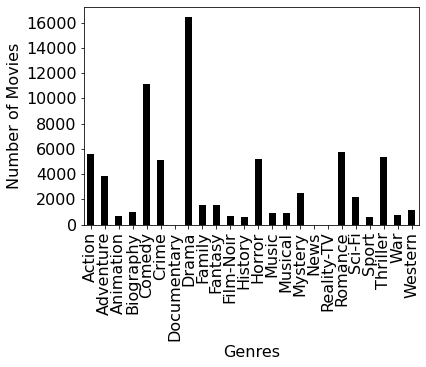

In [19]:
#q8
plot_dict(num_movies_dict, "Genres", "Number of Movies")

In [20]:
#q9
def year_to_decade(year):
    if year % 10 == 0:
        return str(year-9) + " to " + str(year - year % 10)# complete this line
    else:
        return str(year - year % 10 + 1) + " to " + str(year - year % 10 + 10)# complete this line
    
    
decade_dict = {} # the key is the decade, the value is the frequency
for dic in movies:
    decade = year_to_decade(dic['year'])
    if decade not in decade_dict:
        decade_dict[decade] = 1
    else:
        decade_dict[decade] += 1

decade_dict

{'1981 to 1990': 2840,
 '2011 to 2020': 8884,
 '2001 to 2010': 6271,
 '1941 to 1950': 2256,
 '1971 to 1980': 1889,
 '1951 to 1960': 2201,
 '1931 to 1940': 2256,
 '1961 to 1970': 1609,
 '1991 to 2000': 4280,
 '1911 to 1920': 120,
 '1921 to 1930': 496}

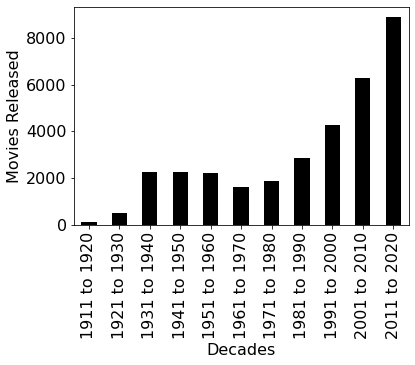

In [21]:
#q10
plot_dict(decade_dict, "Decades", "Movies Released")

In [22]:
#q11
highest_ratings_dict = {key:high_rating_movies(value) for (key, value) in bucket_by_genre.items()}
highest_ratings_dict

{'Action': [{'title': 'The Dark Knight',
   'year': 2008,
   'genres': ['Action', 'Crime', 'Drama'],
   'duration': 152,
   'directors': ['Christopher Nolan'],
   'actors': ['Christian Bale',
    'Heath Ledger',
    'Aaron Eckhart',
    'Michael Caine'],
   'rating': 9.0}],
 'Horror': [{'title': 'Psycho',
   'year': 1960,
   'genres': ['Horror', 'Mystery', 'Thriller'],
   'duration': 109,
   'directors': ['Alfred Hitchcock'],
   'actors': ['Anthony Perkins', 'Vera Miles', 'John Gavin'],
   'rating': 8.5}],
 'Sci-Fi': [{'title': 'Inception',
   'year': 2010,
   'genres': ['Action', 'Adventure', 'Sci-Fi'],
   'duration': 148,
   'directors': ['Christopher Nolan'],
   'actors': ['Leonardo DiCaprio',
    'Joseph Gordon-Levitt',
    'Ellen Page',
    'Tom Hardy'],
   'rating': 8.8}],
 'Crime': [{'title': 'The Godfather',
   'year': 1972,
   'genres': ['Crime', 'Drama'],
   'duration': 175,
   'directors': ['Francis Ford Coppola'],
   'actors': ['Marlon Brando', 'Al Pacino'],
   'rating': 9.

In [23]:
#q12
median_rating_dict = {}
for genre in bucket_by_genre:
    rating_list = []
    for idx in bucket_by_genre[genre]:
        rating_list.append(idx['rating'])
    #print(rating_list)
    #print(median(rating_list))
    if genre not in median_rating_dict:
        median_rating_dict[genre] = median(rating_list)
median_rating_dict

{'Action': 5.5,
 'Horror': 4.6,
 'Sci-Fi': 4.9,
 'Crime': 6.0,
 'Thriller': 5.1,
 'Comedy': 5.9,
 'Drama': 6.1,
 'Romance': 6.2,
 'History': 6.5,
 'Adventure': 6.0,
 'Western': 6.2,
 'Family': 5.9,
 'Fantasy': 5.7,
 'War': 6.4,
 'Sport': 6.1,
 'Biography': 6.7,
 'Mystery': 5.8,
 'Film-Noir': 6.6,
 'Music': 6.2,
 'Animation': 6.4,
 'Musical': 6.2,
 'Reality-TV': 2.1,
 'Documentary': 7.5,
 'News': 6.4}

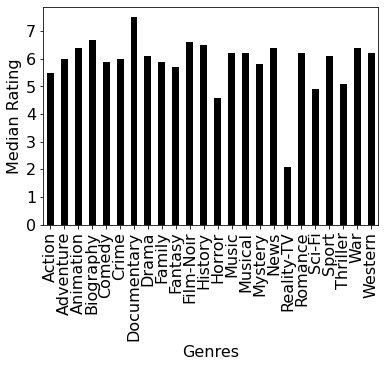

In [24]:
#q13
plot_dict(median_rating_dict, "Genres", "Median Rating")

In [25]:
#q14
rating_dict = dict(sorted(median_rating_dict.items(), key = lambda d:d[1], reverse = True))

genre_medians = []
for key in rating_dict:
    genre_medians.append(key)
genre_medians

['Documentary',
 'Biography',
 'Film-Noir',
 'History',
 'War',
 'Animation',
 'News',
 'Romance',
 'Western',
 'Music',
 'Musical',
 'Drama',
 'Sport',
 'Crime',
 'Adventure',
 'Comedy',
 'Family',
 'Mystery',
 'Fantasy',
 'Action',
 'Thriller',
 'Sci-Fi',
 'Horror',
 'Reality-TV']

In [26]:
#q15
star_wars = copy.copy(movies)
star_wars_movies = search_bar(star_wars, "Star Wars")
sorted(star_wars_movies, key = lambda d:d['year'])

[{'title': 'Star Wars',
  'year': 1977,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 121,
  'directors': ['George Lucas'],
  'actors': ['Mark Hamill', 'Harrison Ford', 'Carrie Fisher'],
  'rating': 8.6},
 {'title': 'Star Wars: Episode V - The Empire Strikes Back',
  'year': 1980,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 124,
  'directors': ['Irvin Kershner'],
  'actors': ['Mark Hamill', 'Harrison Ford'],
  'rating': 8.7},
 {'title': 'Star Wars: Episode VI - Return of the Jedi',
  'year': 1983,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 131,
  'directors': ['Richard Marquand'],
  'actors': ['Mark Hamill',
   'Harrison Ford',
   'Carrie Fisher',
   'Billy Dee Williams',
   'Anthony Daniels'],
  'rating': 8.3},
 {'title': 'Star Wars: Episode I - The Phantom Menace',
  'year': 1999,
  'genres': ['Action', 'Adventure', 'Fantasy'],
  'duration': 136,
  'directors': ['George Lucas'],
  'actors': ['Liam Neeson', 'Ewan McGregor', 'Natalie

In [27]:
#q16
titles = [d for d in movies if 'Clint Eastwood' in d['directors'] and 'Clint Eastwood' in d['actors']]
titles

[{'title': 'Space Cowboys',
  'year': 2000,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood',
   'Tommy Lee Jones',
   'Donald Sutherland',
   'James Garner',
   'James Cromwell'],
  'rating': 6.4},
 {'title': 'Heartbreak Ridge',
  'year': 1986,
  'genres': ['Drama', 'War'],
  'duration': 130,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Marsha Mason', 'Everett McGill', 'Moses Gunn'],
  'rating': 6.9},
 {'title': 'Firefox',
  'year': 1982,
  'genres': ['Action', 'Adventure', 'Thriller'],
  'duration': 136,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Freddie Jones', 'David Huffman'],
  'rating': 6.0},
 {'title': 'The Rookie',
  'year': 1990,
  'genres': ['Action', 'Crime', 'Drama'],
  'duration': 120,
  'directors': ['Clint Eastwood'],
  'actors': ['Clint Eastwood', 'Charlie Sheen'],
  'rating': 5.9},
 {'title': 'Pale Rider',
  'year': 1985,
  'genres': ['Dram

In [28]:
#q17
clint_movie_titles = sorted(titles, key = lambda k:k['duration'])
[d['title'] for d in clint_movie_titles]

['Play Misty for Me',
 'High Plains Drifter',
 'The Gauntlet',
 'Blood Work',
 'White Hunter Black Heart',
 'Pale Rider',
 'Gran Torino',
 'The Mule',
 'Bronco Billy',
 'Sudden Impact',
 'The Rookie',
 'Absolute Power',
 'Honkytonk Man',
 'True Crime',
 'The Eiger Sanction',
 'Space Cowboys',
 'Heartbreak Ridge',
 'Unforgiven',
 'Million Dollar Baby',
 'The Bridges of Madison County',
 'The Outlaw Josey Wales',
 'Firefox',
 'A Perfect World']

In [29]:
#q18
russos = sorted([d for d in movies if 'Anthony Russo' in d['directors'] and 'Joe Russo' in d['directors']], key = lambda k:k['duration'])
[d['title'] for d in russos]

['Welcome to Collinwood',
 'You, Me and Dupree',
 'Captain America: The Winter Soldier',
 'Captain America: Civil War',
 'Avengers: Infinity War',
 'Avengers: Endgame']

In [30]:
#q19
shortest_bio = sorted(bucket_by_genre['Biography'], key = lambda k:k['duration'])
count = 0
shortest15 = []
for dic in shortest_bio:
    if count < 15:
        shortest15.append(dic['title'])
        count += 1
        
shortest15

['Hibakusha',
 'King Candy',
 'Amy Winehouse: Fallen Star',
 'Steve Jobs: Visionary Genius',
 'The Road to Hollywood',
 'Danny Greene: The Rise and Fall of the Irishman',
 'From the Manger to the Cross; or, Jesus of Nazareth',
 'Joseph Smith: Prophet of the Restoration',
 'The Trade',
 'Blondes at Work',
 'Spirit of Youth',
 'The Loves of Edgar Allan Poe',
 'Alexander Hamilton',
 'Dillinger',
 'Memoria']

In [31]:
#q20
big_actors = {}
for actor in bucket_by_actor:
    rating_list = []
    for idx in bucket_by_actor[actor]:
        rating_list.append(idx['rating'])
    if len(rating_list) >= 15:
        big_actors[actor] = median(rating_list)
        
best_actors_dict = dict(sorted(big_actors.items(), key = lambda k:k[-1], reverse = True))

count = 0
best25 = []
for key in best_actors_dict:
    if count < 25:
        best25.append(key)
        count += 1
        
best25

['Audrey Hepburn',
 'Leonardo DiCaprio',
 'Woody Allen',
 'Ryan Gosling',
 'Harold Lloyd',
 'Brad Pitt',
 'Philip Seymour Hoffman',
 'Ralph Fiennes',
 'Laurence Olivier',
 'Groucho Marx',
 'Humphrey Bogart',
 'Amy Adams',
 'Jake Gyllenhaal',
 'Judy Garland',
 'Bette Davis',
 'Albert Brooks',
 'Bill Murray',
 'Russell Crowe',
 'Christian Bale',
 'Buster Keaton',
 'Tom Cruise',
 'Fred Astaire',
 'Chris Cooper',
 'Matt Damon',
 'Donald Crisp']